In [1]:
from ncmcm import *
from IPython.display import display
import os
import pickle
os.chdir('..')
os.chdir('ncmcm')
print(os.getcwd())

/Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm


In [2]:
# Assuming 'A' and 'B' are encoded as strings in your 'Y' variable
b_neurons = [
		'AVAR',
		'AVAL',
		'SMDVR',
		'SMDVL',
		'SMDDR',
		'SMDDL',
		'RIBR',
		'RIBL'
	]
reps = 5
clusters = 30

6 neurons have been removed.
Accuracy for full training data: 0.9021357985336309
Testing markovianity - repetition  1
Clusters: 0
We purpose 57 parts
Clusters: 1
We purpose 28 parts
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small values.
We fill 0 in the transition matrix with very small 

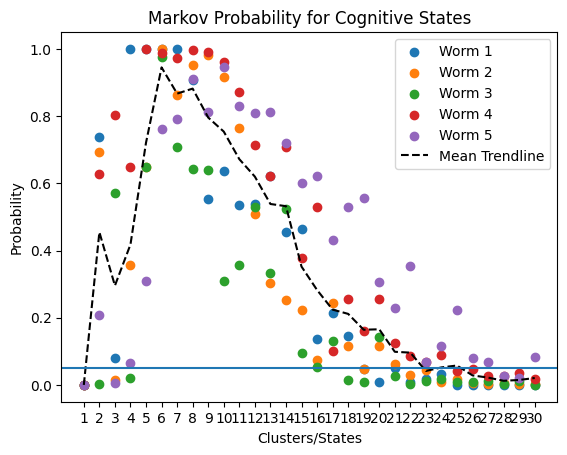

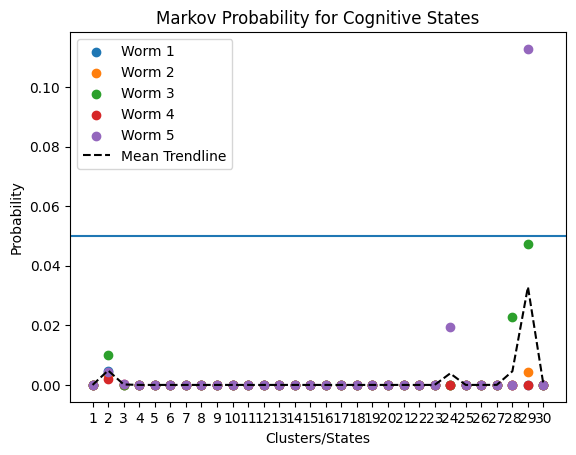

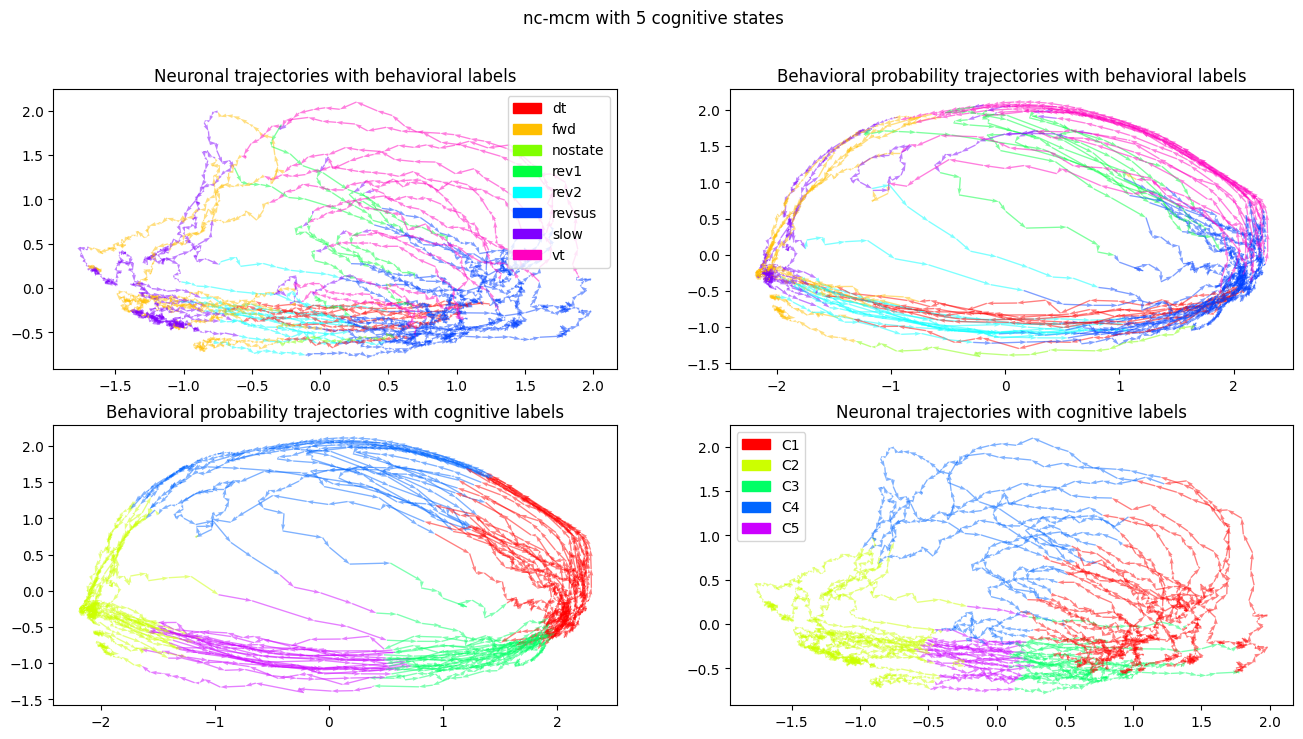

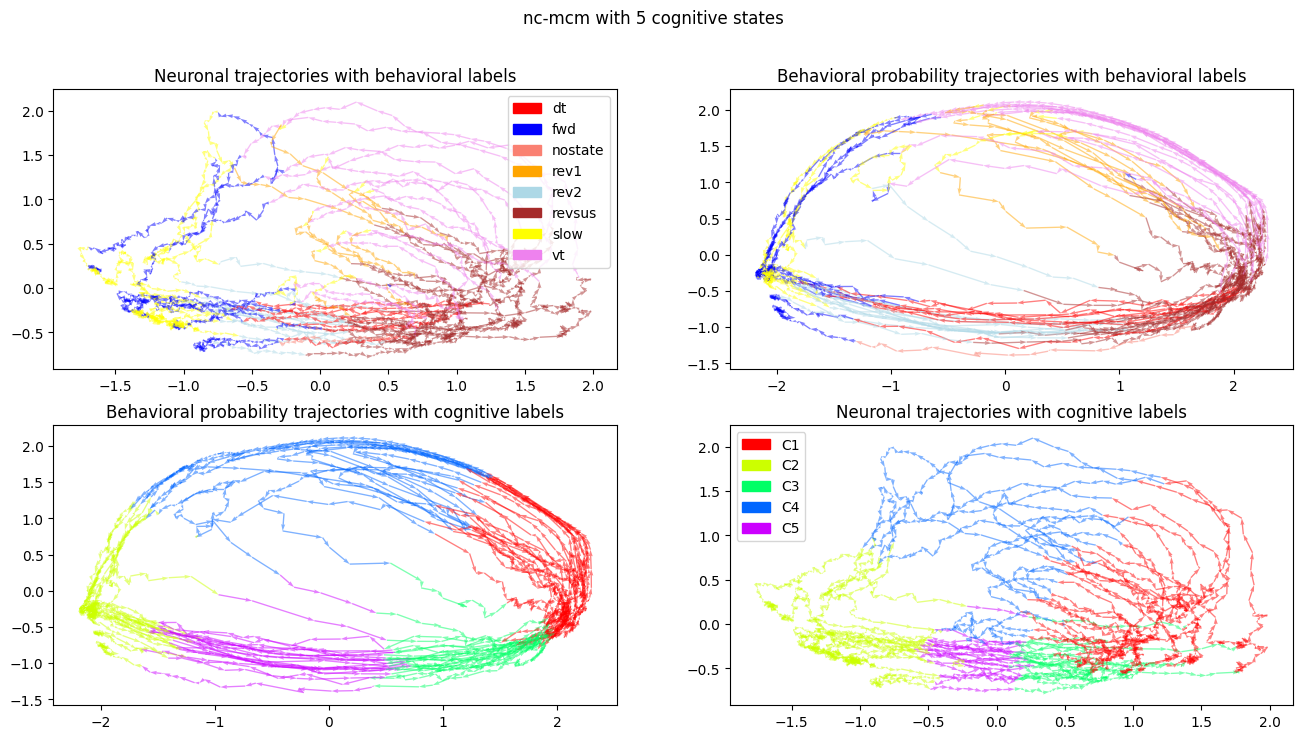

True

In [14]:

data_average_memory = []
data_average_stationary = []
WORMS = []
for i in range(5):
	matlab = Loader(i)
	worm = Database(*matlab.data)
	worm.exclude_neurons(b_neurons)
	lg = LogisticRegression(max_iter=1000, multi_class='multinomial')
	worm.fit_model(lg, ensemble=True)
	worm.cluster_BPT(stationary=True, nrep=reps, max_clusters=clusters, plot_markov=False)
	WORMS.append(worm)
	data_average_memory.append(np.mean(worm.p_memoryless, axis=1))
	data_average_stationary.append(np.mean(worm.p_stationary, axis=1))

average_markov_plot(np.asarray(data_average_memory))
average_markov_plot(np.asarray(data_average_stationary))
data = WORMS[0]
data.step_plot()
data.set_colors(['red', 'blue', 'salmon', 'orange', 'lightblue', 'brown', 'yellow', 'violet'])
data.step_plot()


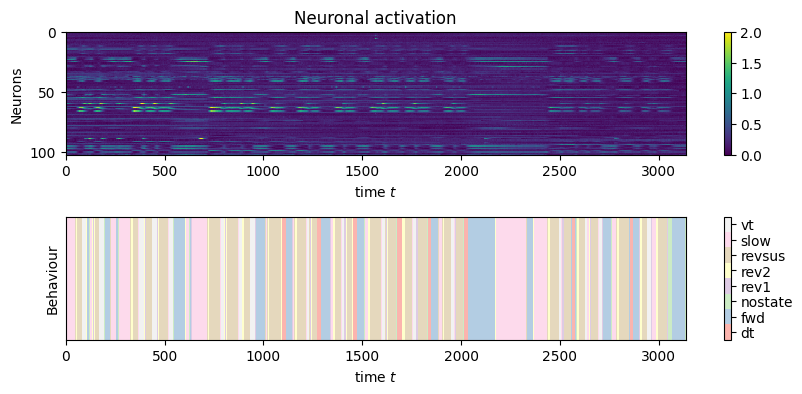

In [16]:
data.plotting_neuronal_behavioral()

Calcualted threshold is:  0.0006666666666666666
Clustering was chosen according to best p-memorylessness.


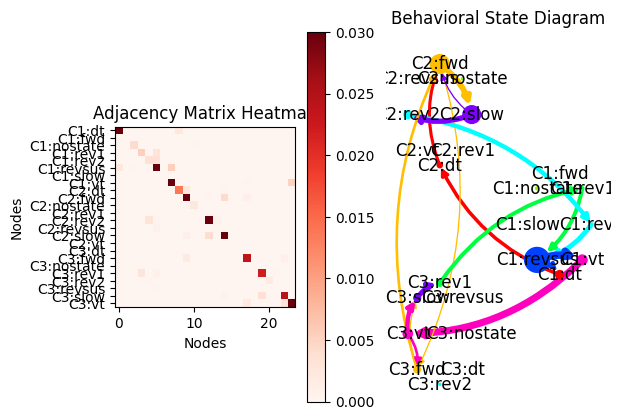

Test_HTML.html
Plot has been saved under: /Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm/Test_HTML.html


True

In [19]:
data.colordict = dict(zip(np.unique(data.B), generate_equidistant_colors(len(data.states), color=None)))
data.colors = [data.colordict[val] for val in data.B]

data.behavioral_state_diagram(interactive=True, adj_matrix=True)

Losses 0.006117 0.005706 0.011824: 100%|██████████| 2000/2000 [01:39<00:00, 20.09it/s]


Points have coordinate shape:  (3122, 3)
Accuracy of BundDLeNet: 0.961


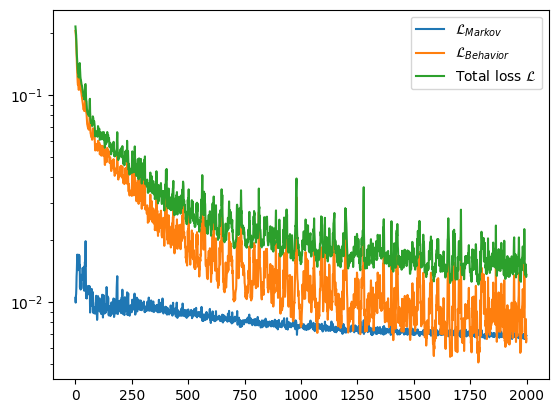

In [20]:
Bundle_Net = data.createVisualizer()
Bundle_Net.plot_loss()

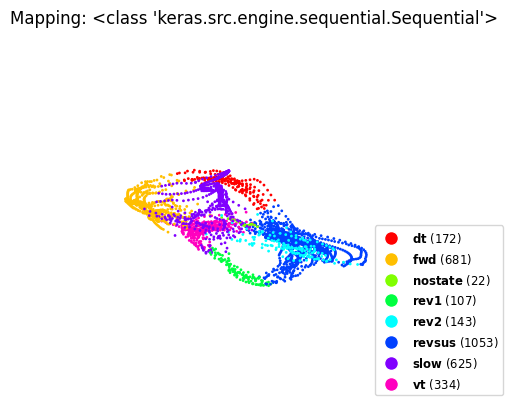

True

In [37]:
Bundle_Net.plot_mapping(show_legend=True)

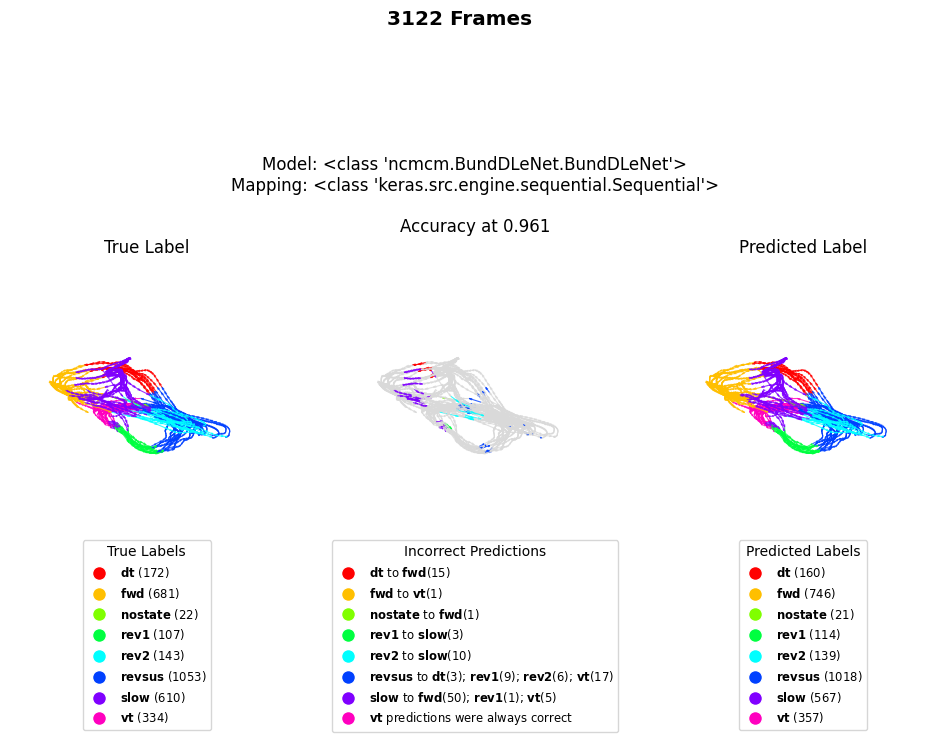

True

In [36]:
Bundle_Net.make_comparison(show_legend=True, quivers=True)

In [41]:
%matplotlib notebook
Bundle_Net.make_movie(draw=False, quivers=True, show_legend=True, interval=10)

<IPython.core.display.Javascript object>

True

In [ ]:
Bundle_Net.save_gif('Example_movie')

In [42]:
# Storing data
for idx, worm in enumerate(WORMS):
	with open(f'/Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm/data/pickles/data_worm_{idx+1}.pkl', 'wb') as file:
		pickle.dump(worm, file)

Points have coordinate shape:  (3137, 3)


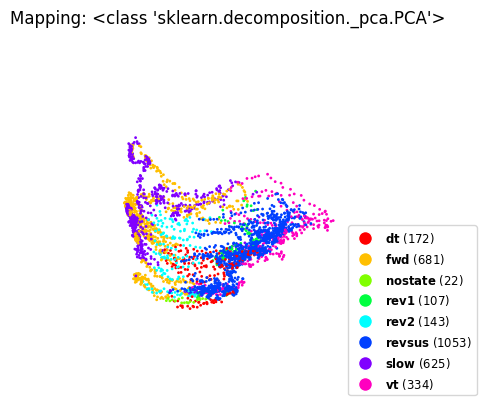

True

In [45]:
%matplotlib inline
Bundle_Net.change_mapping(PCA(n_components=3))
Bundle_Net.plot_mapping(show_legend=True)

In [8]:
# For loading the data
num = 1
with open(f'/Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm/data/pickles/data_worm_{num}.pkl', 'rb') as file:
	data = pickle.load(file)